# Ejercicio: carteras con 4 activos

In [54]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

### Ejercicio 1

Con la siguiente matriz de varianza-covarianzas y las rentabilidades esperadas (medias), determina la desviación típica y la rentabilidad media de las carteras X e Y.

In [55]:
matriz_covarianzas = np.array([[0.10, 0.01, 0.03, 0.05], [0.01, 0.30, 0.06, -0.04], [0.03, 0.06, 0.40, 0.02], [0.05, -0.04, 0.02, 0.50]])


print(matriz_covarianzas)

[[ 0.1   0.01  0.03  0.05]
 [ 0.01  0.3   0.06 -0.04]
 [ 0.03  0.06  0.4   0.02]
 [ 0.05 -0.04  0.02  0.5 ]]


In [56]:
rentabilidad_medias = np.array([0.06, 0.08, 0.1, 0.15])

print(rentabilidad_medias)

[0.06 0.08 0.1  0.15]


In [57]:
pesos_x = np.array([0.2, 0.3, 0.4, 0.1])
pesos_y = np.array([0.2, 0.1, 0.1, 0.6])
print(pesos_x)
print(pesos_y)

[0.2 0.3 0.4 0.1]
[0.2 0.1 0.1 0.6]


**Rentabilidad** de la cartera $E(\tilde R_p)=\sum_{i=1}^{N}w_i E(\tilde R_i)$

$E(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix}  \begin{pmatrix}\mu_1 \\\mu_2  \\...  \\ \mu_N\end{pmatrix} = \mathbf{w}^T\mathbf{\mu}$

In [53]:
# TO-DO Calcula la rentabilidad media de las dos carteras

# Utilizando matrices.

print(pesos_x.shape, rentabilidad_medias.shape)

pesos_x = np.matrix(pesos_x).reshape(-1, 1)  # (4,) -> (4,1)
rentabilidad_medias = np.matrix(rentabilidad_medias).reshape(-1, 1)  # (4,) -> (4, 1)

print(pesos_x.shape, rentabilidad_medias.shape)


mu_x = pesos_x.T @ rentabilidad_medias
mu_y = pesos_y.T @ rentabilidad_medias


print("Rentabilidad media de cartera X: {:.4f}".format(mu_x[0, 0]))
print("Rentabilidad media de cartera Y: {:.4f}".format(mu_y[0, 0]))

(4,) (4,)
(4, 1) (4, 1)
Rentabilidad media de cartera X: 0.0910
Rentabilidad media de cartera Y: 0.1200


In [60]:
# TO-DO Calcula la rentabilidad media de las dos carteras

# Utilizando arrays.

print(pesos_x.shape, rentabilidad_medias.shape)

mu_x = pesos_x.T @ rentabilidad_medias
mu_y = pesos_y.T @ rentabilidad_medias


print("Rentabilidad media de cartera X: {:.4f}".format(mu_x))
print("Rentabilidad media de cartera Y: {:.4f}".format(mu_y))

(4,) (4,)
Rentabilidad media de cartera X: 0.0910
Rentabilidad media de cartera Y: 0.1200


$\sigma²(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}w_1 \\w_2  \\...  \\ w_N\end{pmatrix} = \mathbf{w}^T\mathbf{C}\mathbf{w}$

In [61]:
# TO-DO Calcula la desviación típica de las dos carteras
sigma2_x = pesos_x.T @ matriz_covarianzas @ pesos_x
sigma2_y = pesos_y.T @ matriz_covarianzas @ pesos_y

sigma_x = np.sqrt(sigma2_x)
sigma_y = np.sqrt(sigma2_y)

print("Desviación típica de cartera X: {:.4f}".format(sigma_x))
print("Desviación típica de cartera Y: {:.4f}".format(sigma_y))

Desviación típica de cartera X: 0.3487
Desviación típica de cartera Y: 0.4510


---

### Ejercicio 2

Determina la covarianza de las dos carteras X e Y a partir de sus pesos y la matriz de covarianzas.

$covar(X,Y)=\begin{pmatrix}x_1 & x_2 & ... & x_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}y_1 \\y_2  \\...  \\ y_N\end{pmatrix} = \mathbf{X}^T\mathbf{C}\mathbf{Y}$

Razonamiento tras la fórmula:

$$
\text{covar}_{XY} = \text{pesos}_x^\top \cdot \text{matriz\_covarianzas} \cdot \text{pesos}_y
$$

representa la covarianza entre dos carteras \(X\) e \(Y\) porque cada cartera es una combinación lineal de los rendimientos de los activos. A continuación se explica el razonamiento:

1. **Definición de las carteras como combinaciones lineales:**

   La rentabilidad de la cartera \(X\) se expresa como

   $$
   X = \sum_{i=1}^{n} w_{x,i} \, R_i,
   $$

   y la rentabilidad de la cartera \(Y\) como

   $$
   Y = \sum_{j=1}^{n} w_{y,j} \, R_j,
   $$

   donde:
   
   - $R_i$ es la rentabilidad del activo \(i\).
   - $w_{x,i}$ es el peso del activo \(i\) en la cartera \(X\).
   - $w_{y,j}$ es el peso del activo \(j\) en la cartera \(Y\).

2. **Propiedad lineal de la covarianza:**

   La covarianza entre \(X\) e \(Y\) se define por

   $$
   \text{Cov}(X, Y) = \text{Cov}\left(\sum_{i=1}^{n} w_{x,i} \, R_i,\, \sum_{j=1}^{n} w_{y,j} \, R_j\right).
   $$

   Aplicando la propiedad bilineal de la covarianza, se tiene que

   $$
   \text{Cov}(X, Y) = \sum_{i=1}^{n} \sum_{j=1}^{n} w_{x,i} \, w_{y,j} \, \text{Cov}(R_i, R_j).
   $$

3. **Representación matricial:**

   Definimos los vectores de pesos:

   $$
   \text{pesos}_x = \begin{bmatrix} w_{x,1} \\ w_{x,2} \\ \vdots \\ w_{x,n} \end{bmatrix}, \quad
   \text{pesos}_y = \begin{bmatrix} w_{y,1} \\ w_{y,2} \\ \vdots \\ w_{y,n} \end{bmatrix}.
   $$

   Y la matriz de covarianzas de los activos:

   $$
   \text{matriz\_covarianzas} = \Sigma = \begin{bmatrix}
   \text{Cov}(R_1, R_1) & \text{Cov}(R_1, R_2) & \cdots & \text{Cov}(R_1, R_n) \\
   \text{Cov}(R_2, R_1) & \text{Cov}(R_2, R_2) & \cdots & \text{Cov}(R_2, R_n) \\
   \vdots & \vdots & \ddots & \vdots \\
   \text{Cov}(R_n, R_1) & \text{Cov}(R_n, R_2) & \cdots & \text{Cov}(R_n, R_n)
   \end{bmatrix}.
   $$

   De esta forma, la suma doble se puede escribir de forma compacta mediante multiplicación matricial:

   $$
   \text{Cov}(X, Y) = \text{pesos}_x^\top \, \Sigma \, \text{pesos}_y.
   $$

In [62]:
# TO-DO Calcula la covarianza entre las dos carteras X e Y
covar_XY = pesos_x.T @ matriz_covarianzas @ pesos_y

print("Covarianzas entre X e Y: {:.4f}".format(covar_XY))

Covarianzas entre X e Y: 0.0714


---

### Ejercicio 3

Crea una cartera en la que inviertes el 30% en la cartera X y el 70% restante en la cartera Y y determina su rentabilidad esperada y su desviación típica.

In [63]:
# TO-DO Define los pesos de la nueva cartera y calcula la rentabilidad media
pesos_new = np.array([0.3, 0.7])
mu_carteras = np.array([mu_x, mu_y])

mu_xy = pesos_new.T @ mu_carteras

print("Rentabilidad de la nueva cartera XY: {:.4f}".format(mu_xy))

Rentabilidad de la nueva cartera XY: 0.1113


In [64]:
# TO-DO Estima la matriz de varianzas-covarianzas
S_carteras = np.array([[sigma2_x, covar_XY], [covar_XY, sigma2_y]])
print(S_carteras)

[[0.1216 0.0714]
 [0.0714 0.2034]]


In [65]:
# TO-DO Calcula la desviación típica
sigma2_xy = pesos_new.T @ S_carteras @ pesos_new
sigma_xy = np.sqrt(sigma2_xy)
sigma_xy

print("Desviación típica de la nueva cartera XY: {:.4f}".format(sigma_xy))

Desviación típica de la nueva cartera XY: 0.3750


---

### Ejercicio 4

Genera 100 carteras empezando invirtiendo 0% de tu presupuesto en X hasta el 100% de tu presupuesto en X.

In [66]:
mus = []
sigmas = []

# TO-DO Genera 100 carteras cambiando sus pesos y calcula la media y desviación de cada una
for w_x in np.linspace(0.0, 1.0, 100):
    w_y = 1.0 - w_x

    pesos_new = np.array([w_x, w_y])
    mu_new = pesos_new.T @ mu_carteras
    sigma2_new = pesos_new.T @ S_carteras @ pesos_new
    sigma_new = np.sqrt(sigma2_new)

    mus.append(mu_new)
    sigmas.append(sigma_new)

Representa gráficamente las 100 carteras, dibujando además las dos carteras iniciales.

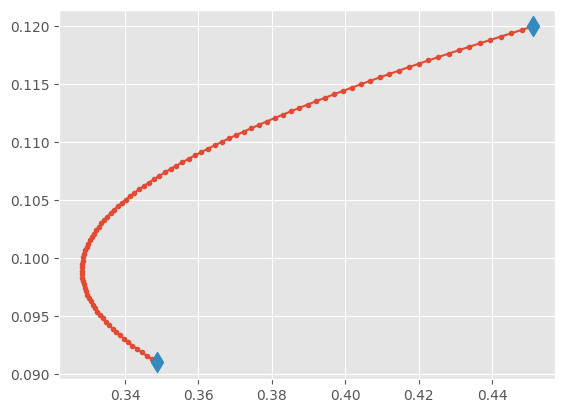

In [67]:
# TO-DO Dibuja las 100 carteras y las dos carteras iniciales
plt.plot(sigmas, mus, ".-")
plt.plot([sigma_x, sigma_y], [mu_x, mu_y], "d", markersize=10)
plt.show()

Genera una nueva figura añadiendo, además, los cuatro activos.

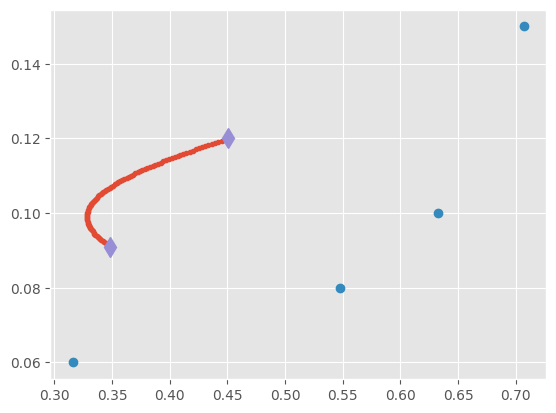

In [68]:
# TO-DO Vuelve a generar la figura añadiendo los 4 activos
plt.plot(sigmas, mus, ".-")
plt.plot(np.sqrt(np.diag(matriz_covarianzas)), rentabilidad_medias, "o")
plt.plot([sigma_x, sigma_y], [mu_x, mu_y], "d", markersize=10)
plt.show()

---

### Ejercicio 5

Genera 10.000 carteras aleatorias, calcula sus rentabilidades medias y sus desviaciones típicas y represéntalas gráficamente junto a la figura anterior.

In [70]:
num_carteras = 10000
num_activos = 4

# TO-DO Genera las 10000 carteras aleatorias
rng = np.random.default_rng(42)
pesos = rng.random(size=(num_carteras, num_activos))
pesos = pesos / pesos.sum(axis=1, keepdims=True)
pesos.shape

In [77]:
# TO-DO Calcula las rentabilidades y las desviaciones típicas
r_carteras = pesos @ rentabilidad_medias
std_carteras = np.sqrt(np.diag((pesos @ matriz_covarianzas @ pesos.T)))

[0.09824205 0.10612291 0.1171668  ... 0.0975393  0.10322618 0.09211196]
[0.32324851 0.36096397 0.40002563 ... 0.37123401 0.34584718 0.29087977]


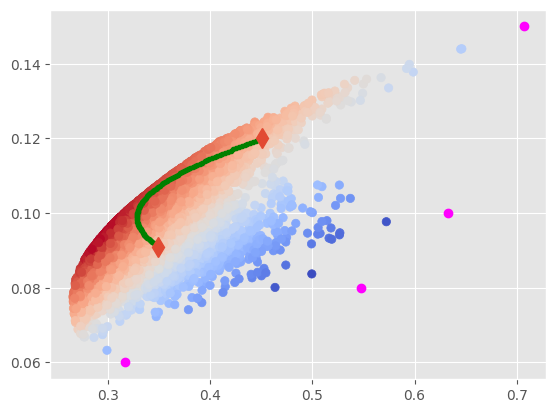

In [72]:
# TO-DO Añade a la figura previa las 10000 carteras
plt.scatter(std_carteras, r_carteras, c=r_carteras / std_carteras, marker="o", cmap="coolwarm")
plt.plot(sigmas, mus, ".", color="green")
plt.plot([sigma_x, sigma_y], [mu_x, mu_y], "d", markersize=10)
plt.plot(np.sqrt(np.diag(matriz_covarianzas)), rentabilidad_medias, "o", color="magenta")
plt.show()